## Task 2 - Exploratory Data Analysis & Data Cleaning

This notebook is for Historical customer data EDA

## Data Dictionary

<img src = "detail.jpg">

## Summary

1. Drop columns that has high amounts of zeros and missing values (> 5% ot total)
2. Decided to drop forecast columns since not sure how accurate the values are in future
3. Decided not to use the other historical energy and power data since too many zeros

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("train.csv", 
                 parse_dates=['date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal'],
                dayfirst=True)

In [3]:
df

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,NaT,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaT,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaT,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaT,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   campaign_disc_ele         0 non-null      float64       
 3   channel_sales             11878 non-null  object        
 4   cons_12m                  16096 non-null  int64         
 5   cons_gas_12m              16096 non-null  int64         
 6   cons_last_month           16096 non-null  int64         
 7   date_activ                16096 non-null  datetime64[ns]
 8   date_end                  16094 non-null  datetime64[ns]
 9   date_first_activ          3508 non-null   datetime64[ns]
 10  date_modif_prod           15939 non-null  datetime64[ns]
 11  date_renewal              16056 non-null  datetime64[ns]
 12  forecast_base_bill

In [5]:
df.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [6]:
df.columns

Index(['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'], dtype='object')

In [7]:
prof = ProfileReport(df, minimal=True, dark_mode=True)

In [8]:
prof

## Data Visualization

### Univariate Data Exploration

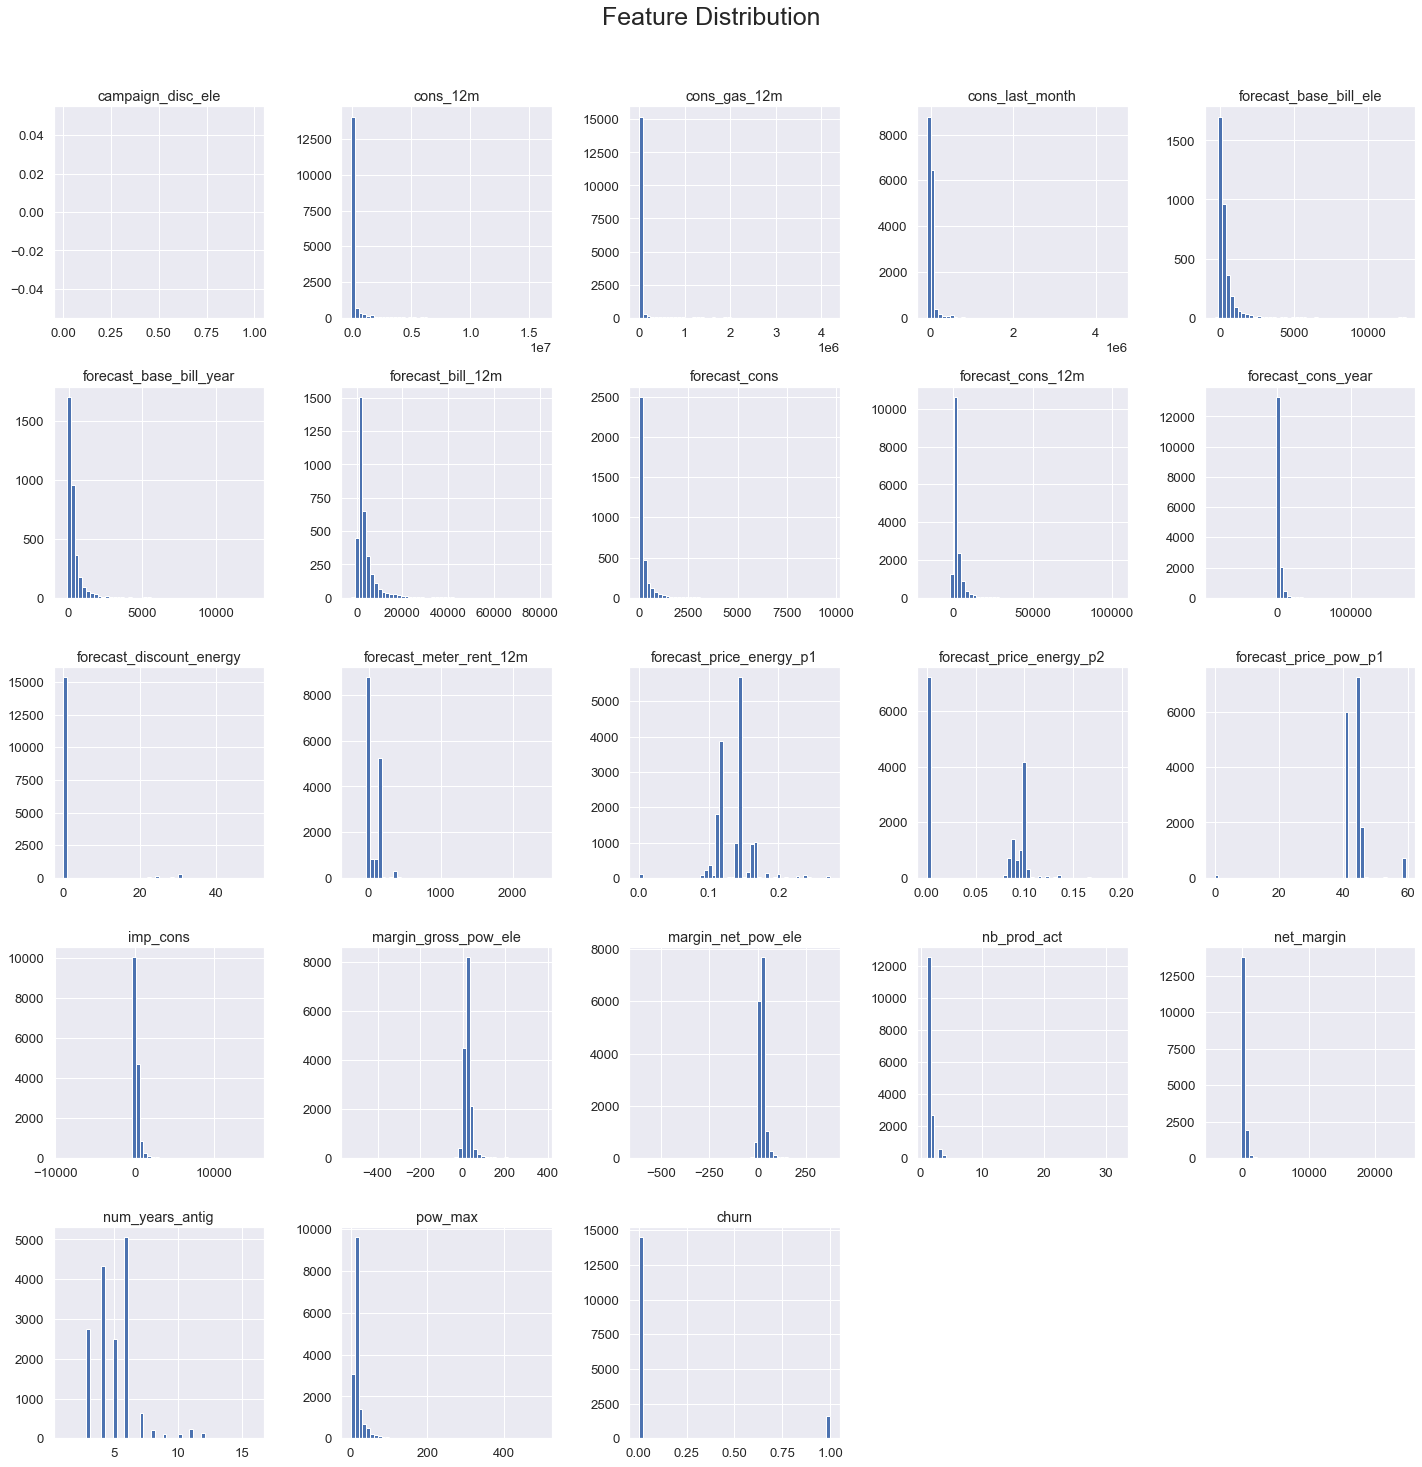

In [9]:
df.hist(bins=50, figsize=(20,20))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=25)
plt.tight_layout()
plt.show()

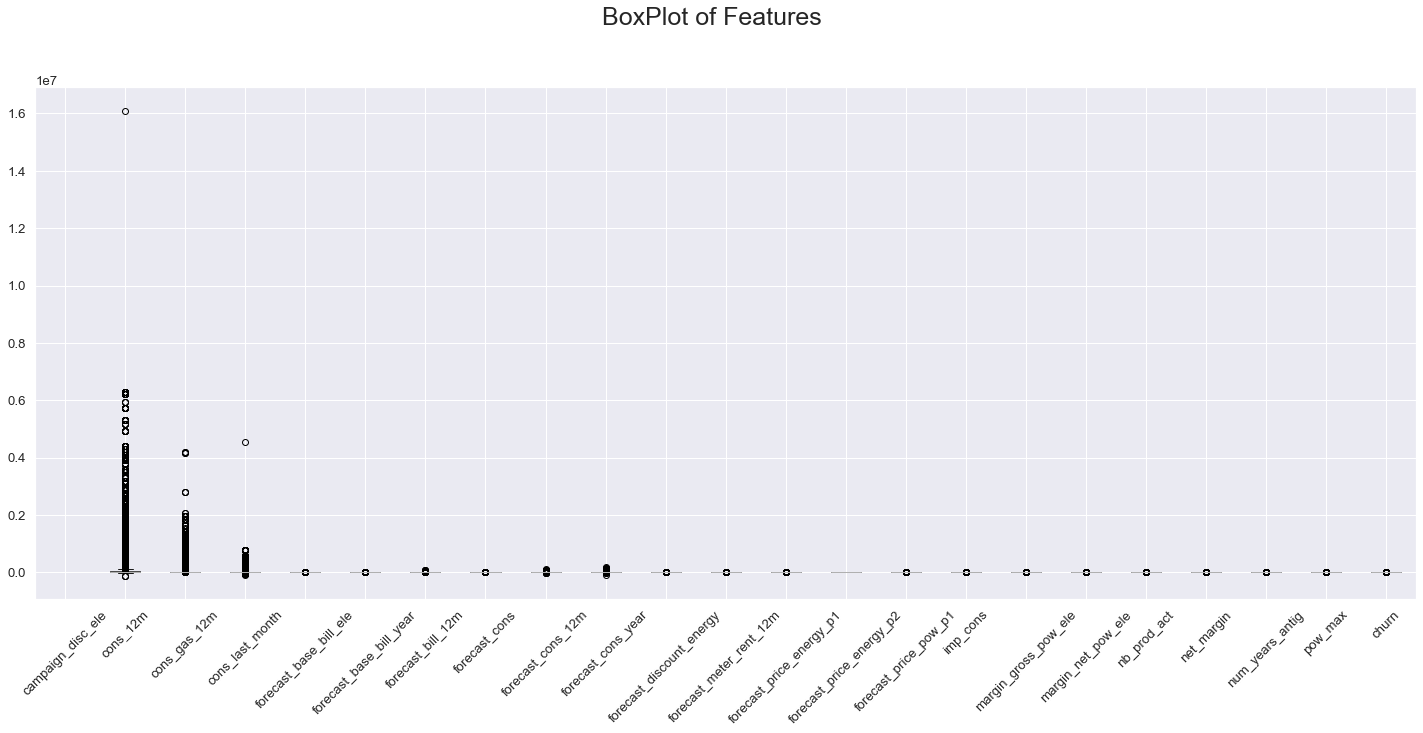

In [10]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot of Features', x=0.5, y=1.02, ha='center', fontsize=25)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Drop unwanted features

In [11]:
df.columns

Index(['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   campaign_disc_ele         0 non-null      float64       
 3   channel_sales             11878 non-null  object        
 4   cons_12m                  16096 non-null  int64         
 5   cons_gas_12m              16096 non-null  int64         
 6   cons_last_month           16096 non-null  int64         
 7   date_activ                16096 non-null  datetime64[ns]
 8   date_end                  16094 non-null  datetime64[ns]
 9   date_first_activ          3508 non-null   datetime64[ns]
 10  date_modif_prod           15939 non-null  datetime64[ns]
 11  date_renewal              16056 non-null  datetime64[ns]
 12  forecast_base_bill

In [13]:
df.drop(['id', 'activity_new', 'campaign_disc_ele', 'channel_sales','date_first_activ', 'cons_12m', 'cons_gas_12m',
         'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year', 
         'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m', 'forecast_cons_year', 
         'forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_p1', 
         'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons','origin_up'], axis=1, inplace=True)

In [14]:
df.head()

,cons_last_month,date_activ,date_end,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,10025,2012-11-07,2016-11-06,f,-41.76,-41.76,1,1732.36,3,180.000,0
1,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1
2,0,2009-08-21,2016-08-30,f,16.38,16.38,1,18.89,6,13.800,0
3,0,2010-04-16,2016-04-16,f,28.60,28.60,1,6.60,6,13.856,0
4,0,2010-03-30,2016-03-30,f,30.22,30.22,1,25.46,6,13.200,0


In [15]:
df["duration"] = (df.date_end - df.date_activ).dt.days

In [16]:
df.head()

,cons_last_month,date_activ,date_end,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration
0,10025,2012-11-07,2016-11-06,f,-41.76,-41.76,1,1732.36,3,180.000,0,1460.0
1,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1,1096.0
2,0,2009-08-21,2016-08-30,f,16.38,16.38,1,18.89,6,13.800,0,2566.0
3,0,2010-04-16,2016-04-16,f,28.60,28.60,1,6.60,6,13.856,0,2192.0
4,0,2010-03-30,2016-03-30,f,30.22,30.22,1,25.46,6,13.200,0,2192.0


In [17]:
df2 = pd.read_csv("customerchurn.csv")

In [18]:
df2

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0
1,0.146427,0.000000,0.000000,44.385450,0.000000,0.000000,0
2,0.181559,0.000000,0.000000,45.319710,0.000000,0.000000,0
3,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,0
4,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0
...,...,...,...,...,...,...,...
16091,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,0
16092,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,0
16093,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,0
16094,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,0


In [19]:
prof2 = ProfileReport(df2, dark_mode=True)

In [20]:
prof2

In [21]:
df = df[['cons_last_month', 'date_activ', 'date_end', 'has_gas', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'duration', 'churn' ]]

In [22]:
df.head()

,cons_last_month,date_activ,date_end,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,duration,churn
0,10025,2012-11-07,2016-11-06,f,-41.76,-41.76,1,1732.36,3,180.000,1460.0,0
1,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1096.0,1
2,0,2009-08-21,2016-08-30,f,16.38,16.38,1,18.89,6,13.800,2566.0,0
3,0,2010-04-16,2016-04-16,f,28.60,28.60,1,6.60,6,13.856,2192.0,0
4,0,2010-03-30,2016-03-30,f,30.22,30.22,1,25.46,6,13.200,2192.0,0


In [23]:
df.drop(['date_activ', 'date_end'],axis=1,inplace=True)

In [24]:
df.columns

Index(['cons_last_month', 'has_gas', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'duration', 'churn'], dtype='object')

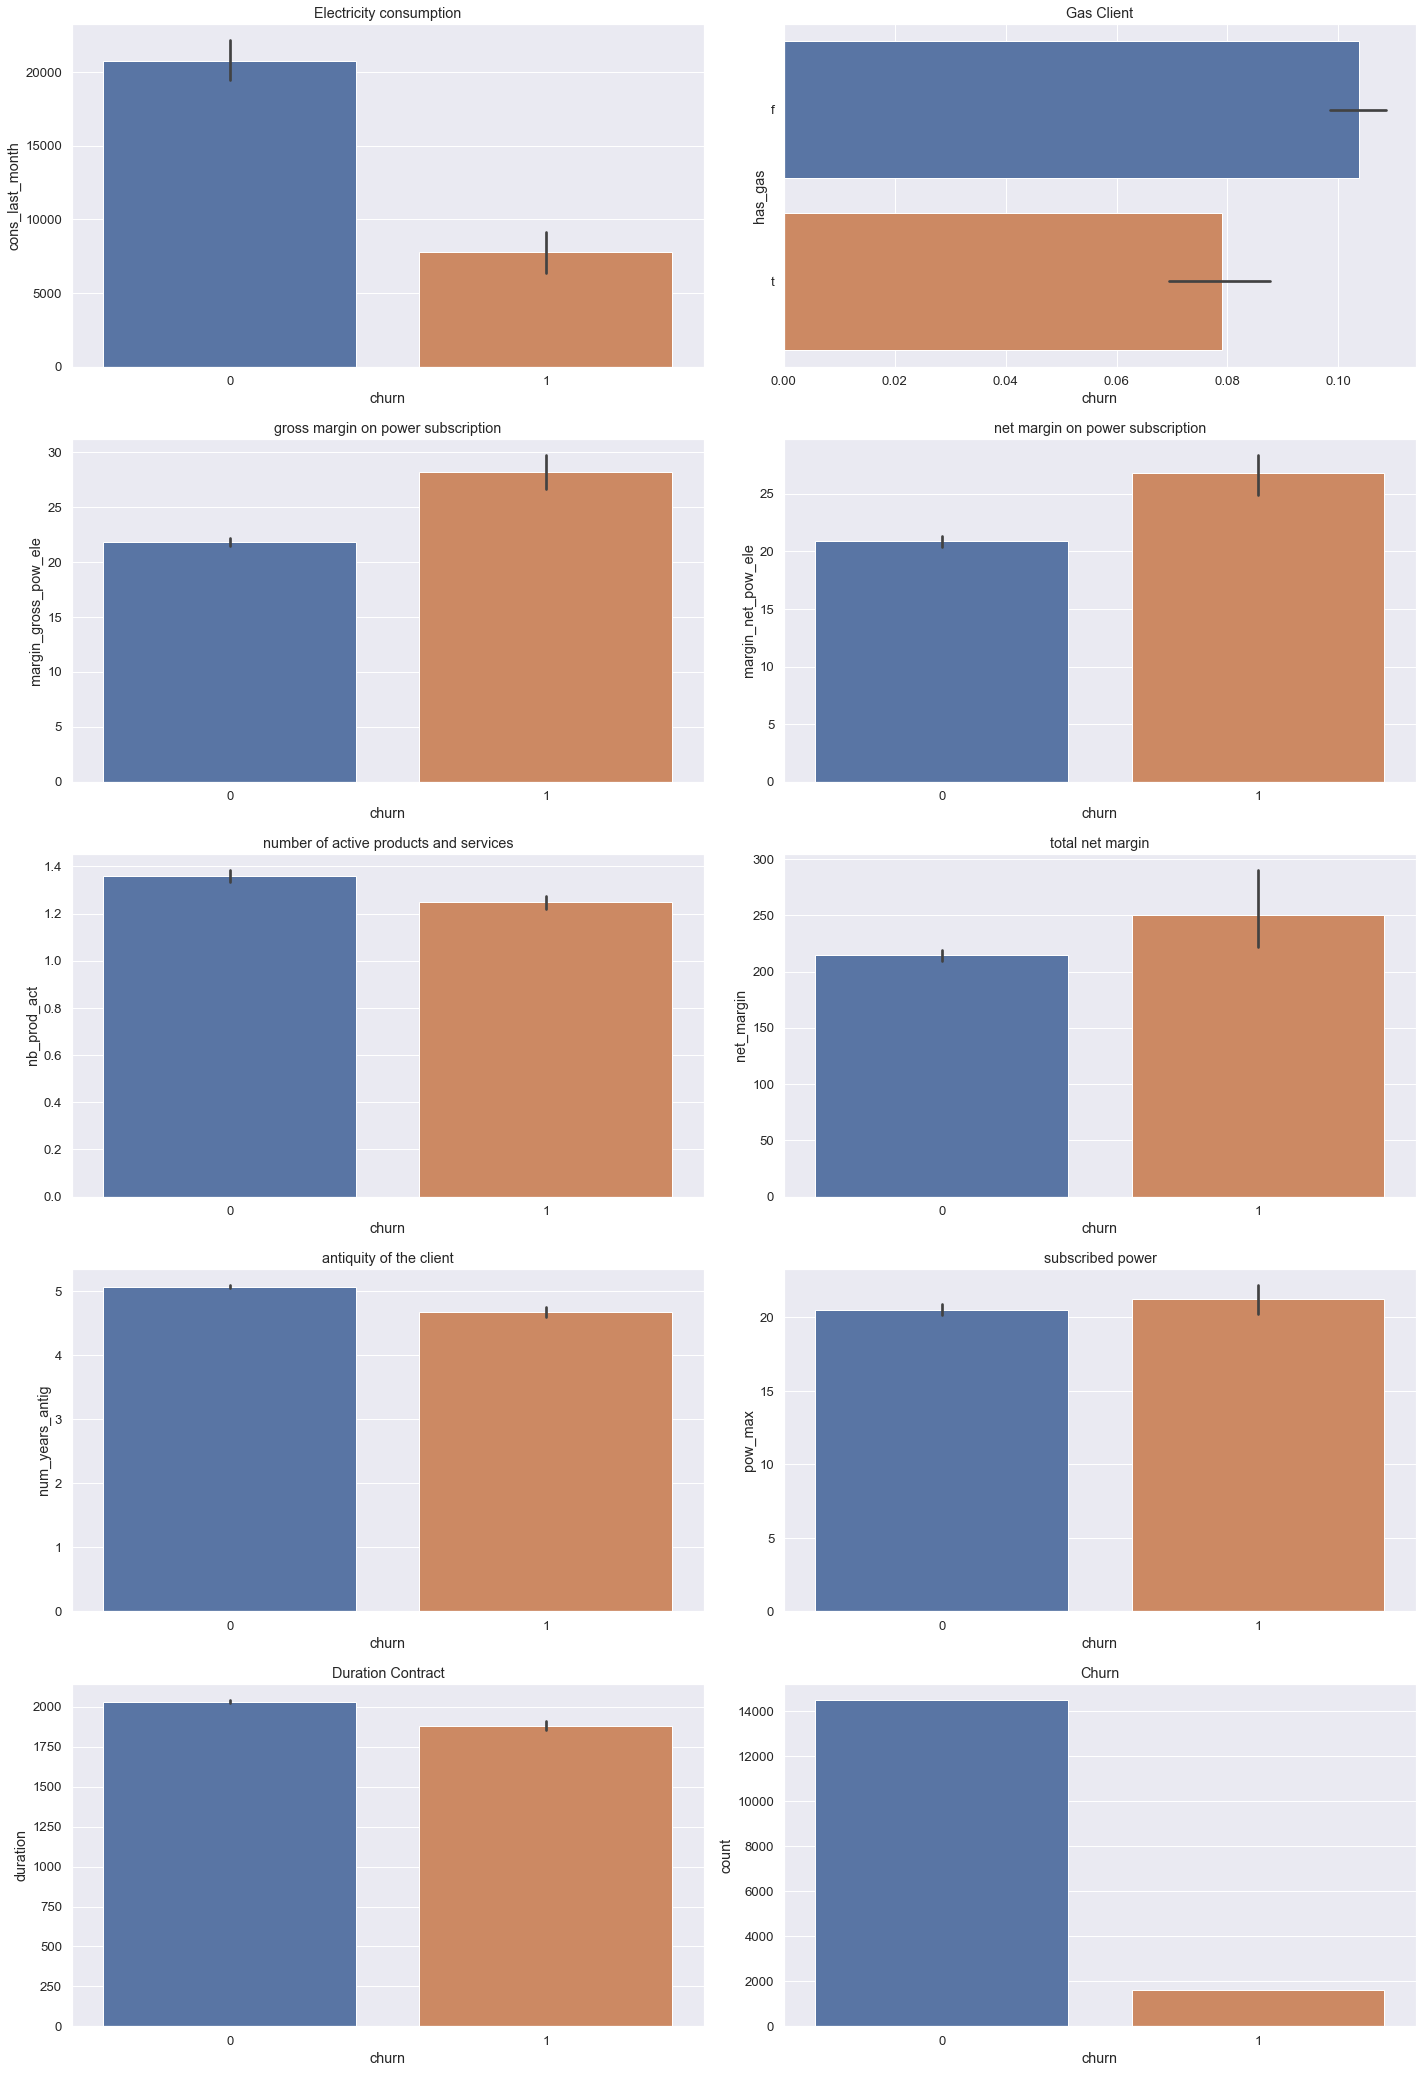

In [25]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("Electricity consumption")
sns.barplot(x=df.churn, y=df.cons_last_month, data=df)

plt.subplot(7,2,2)
plt.title("Gas Client")
sns.barplot(x=df.churn, y=df.has_gas, data=df)

plt.subplot(7,2,3)
plt.title("gross margin on power subscription")
sns.barplot(x=df.churn, y=df.margin_gross_pow_ele, data=df)

plt.subplot(7,2,4)
plt.title("net margin on power subscription")
sns.barplot(x=df.churn, y=df.margin_net_pow_ele, data=df)

plt.subplot(7,2,5)
plt.title("number of active products and services")
sns.barplot(x=df.churn, y=df.nb_prod_act, data=df)

plt.subplot(7,2,6)
plt.title("total net margin")
sns.barplot(x=df.churn, y=df.net_margin, data=df)

plt.subplot(7,2,7)
plt.title("antiquity of the client")
sns.barplot(x=df.churn, y=df.num_years_antig, data=df)

plt.subplot(7,2,8)
plt.title("subscribed power")
sns.barplot(x=df.churn, y=df.pow_max, data=df)

plt.subplot(7,2,9)
plt.title("Duration Contract")
sns.barplot(x=df.churn, y=df.duration, data=df)

plt.subplot(7,2,10)
plt.title("Churn")
sns.countplot(x=df.churn, data=df)



plt.tight_layout()
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

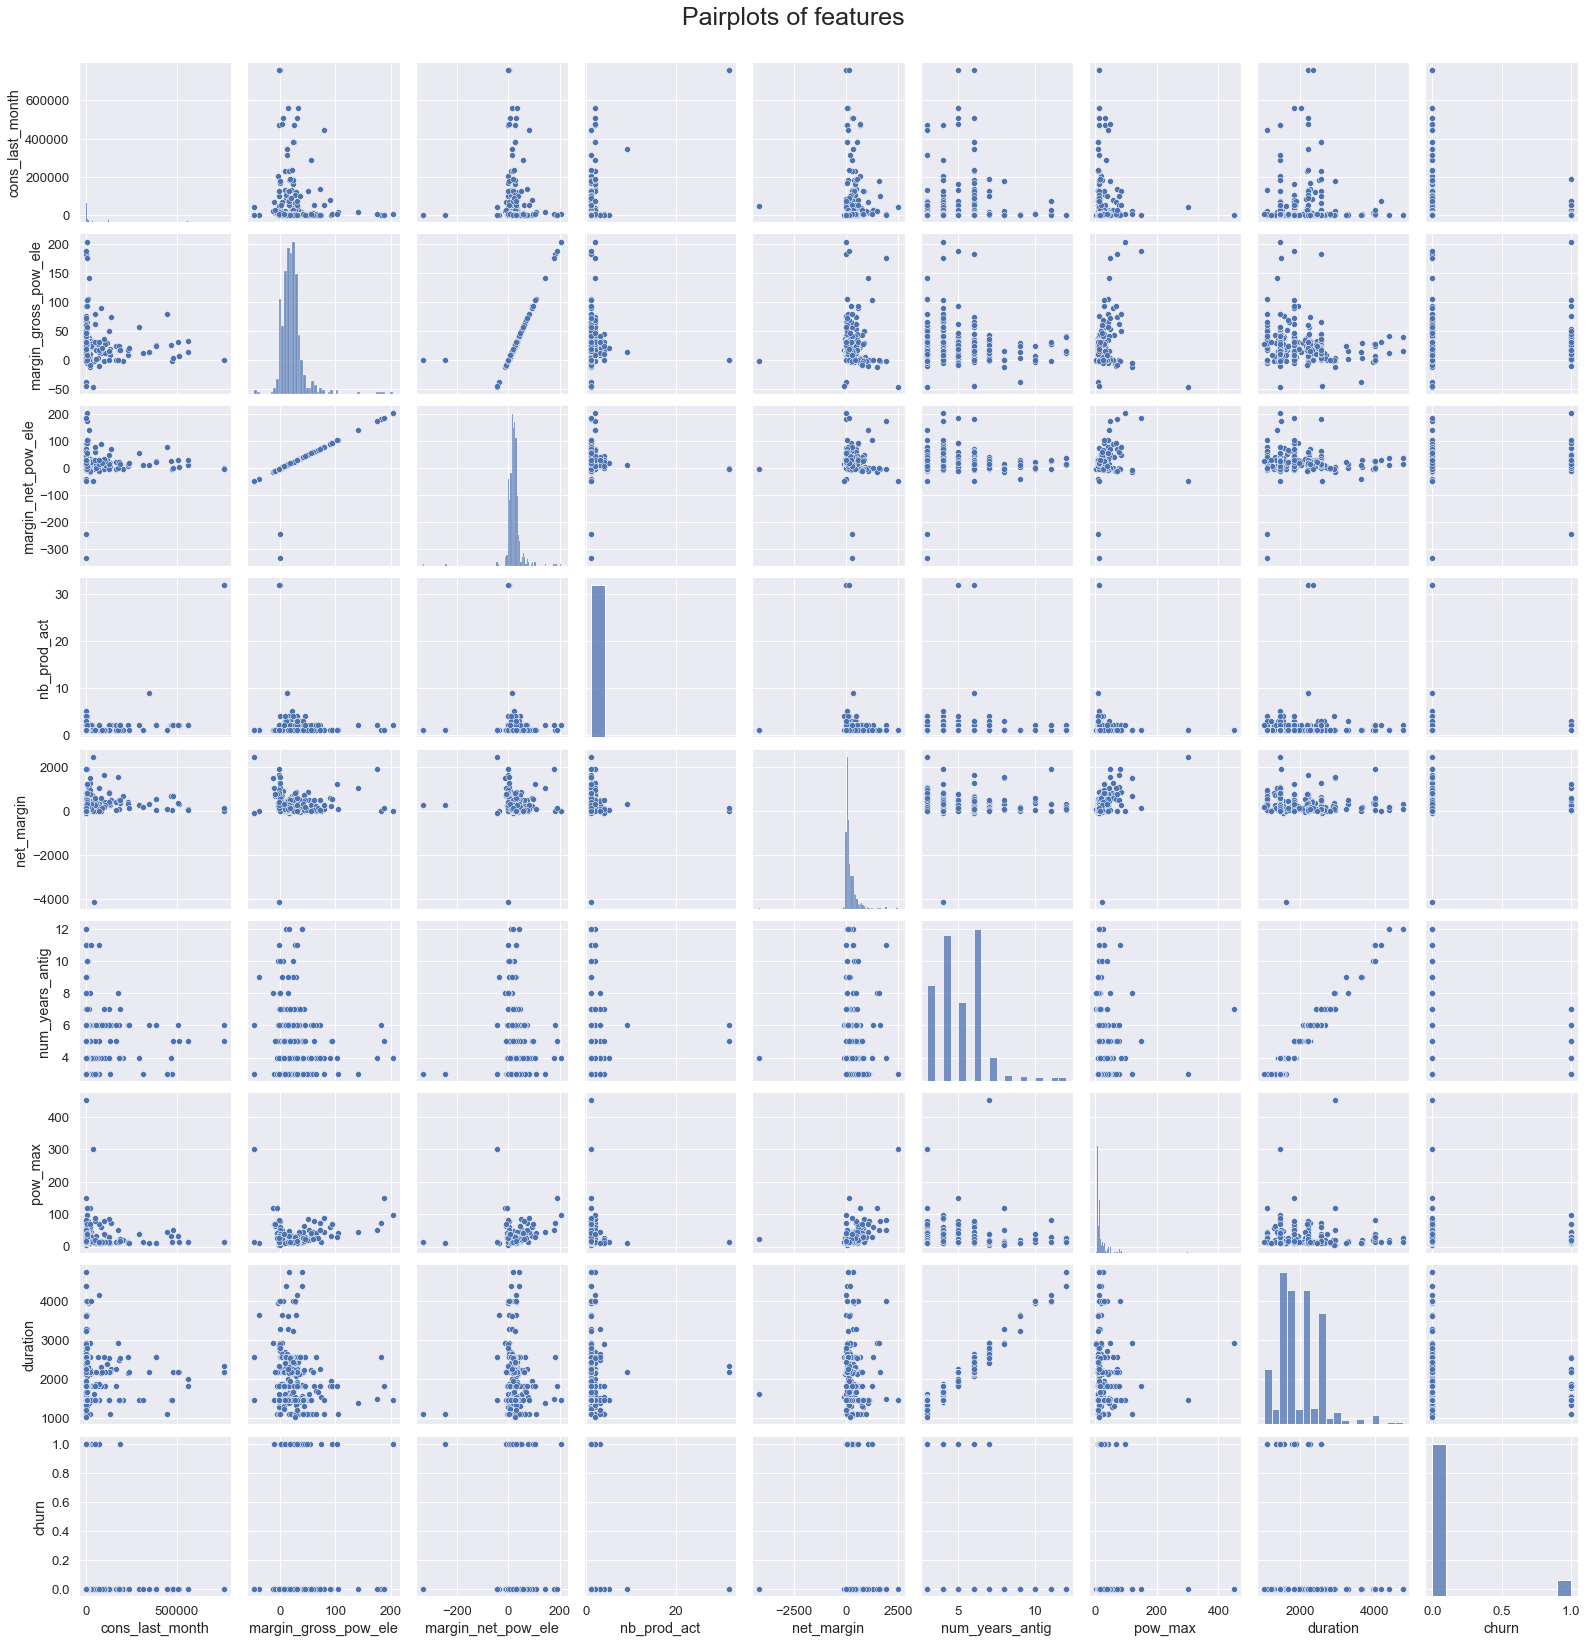

In [26]:
plt.figure(figsize=(20,20))
sns.pairplot(df.sample(500))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=25)
plt.show()

### Correlation

In [27]:
df.corr()

,cons_last_month,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,duration,churn
cons_last_month,1.000000,-0.054114,-0.037696,0.350711,0.096424,0.004860,0.089565,-0.015689,-0.046931
margin_gross_pow_ele,-0.054114,1.000000,0.766521,-0.043771,-0.098609,-0.081516,-0.013654,-0.132490,0.080158
margin_net_pow_ele,-0.037696,0.766521,1.000000,-0.032199,-0.086364,-0.037913,-0.001202,-0.076650,0.063187
nb_prod_act,0.350711,-0.043771,-0.032199,1.000000,0.004547,0.009384,0.018390,0.002588,-0.022609
net_margin,0.096424,-0.098609,-0.086364,0.004547,1.000000,0.034960,0.457120,0.025841,0.029308
num_years_antig,0.004860,-0.081516,-0.037913,0.009384,0.034960,1.000000,0.084789,0.958663,-0.071565
pow_max,0.089565,-0.013654,-0.001202,0.018390,0.457120,0.084789,1.000000,0.076876,0.009456
duration,-0.015689,-0.132490,-0.076650,0.002588,0.025841,0.958663,0.076876,1.000000,-0.072194
churn,-0.046931,0.080158,0.063187,-0.022609,0.029308,-0.071565,0.009456,-0.072194,1.000000


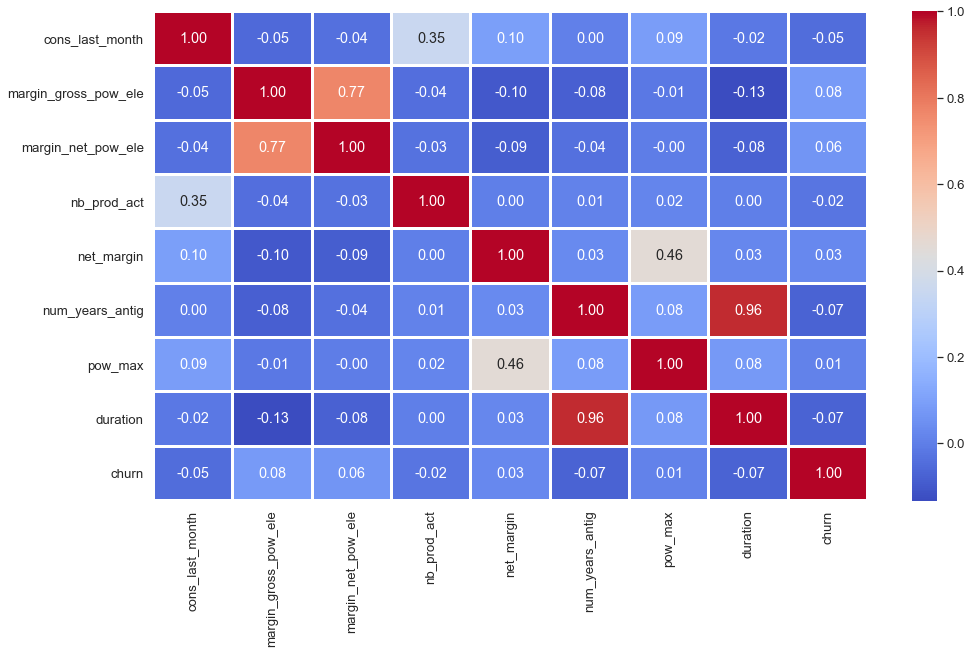

In [28]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in subscribed power")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in subscribed power")


### Levene's Test

In [43]:
scipy.stats.levene(df.pow_max,df.churn, center='mean')

LeveneResult(statistic=5254.355389333101, pvalue=0.0)

### T-Test

In [44]:
scipy.stats.ttest_ind(df.pow_max,df.churn, equal_var = True)

Ttest_indResult(statistic=120.6744917107805, pvalue=0.0)

### ANOVA

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable.

State the hypothesis

-   $H_0: µ\_1 = µ\_2 $ Has Gas and Churn are the same
-   $H_1:$ At least one of the means differ


In [45]:
f_statistic, p_value = scipy.stats.f_oneway(df.has_gas,df.churn)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 483.7059660560216, P-Value: 2.0365100303230416e-106


### Chi-square

State the hypothesis:

-   $H_0:$ The customer churn is independent of number of products
-   $H_1:$ The customer churn is associated with number of products

In [46]:
#Create a Cross-tab table

cont_table  = pd.crosstab(df.nb_prod_act, df.churn)
cont_table

churn,0,1
nb_prod_act,,
1,11250,1294
2,2477,227
3,505,56
4,155,15
5,34,3
6,9,0
8,8,0
9,12,0
10,2,0


In [47]:
scipy.stats.chi2_contingency(cont_table, correction = True)

(16.207588331941654,
 0.09384214899347924,
 10,
 array([[11299.43169943,  1244.56830057],
        [ 2435.71933317,   268.28066683],
        [  505.33969893,    55.66030107],
        [  153.1332421 ,    16.8667579 ],
        [   33.32899975,     3.67100025],
        [    8.10705399,     0.89294601],
        [    7.20627022,     0.79372978],
        [   10.80940532,     1.19059468],
        [    1.80156755,     0.19843245],
        [    3.60313511,     0.39686489],
        [   22.51959443,     2.48040557]]))

### Correlation

State the hypothesis:

-   $H_0:$ 
-   $H_1:$ 


In [48]:
#scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

## Data Preprocessing

In [32]:
df.head()

,cons_last_month,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,duration,churn
0,10025,f,-41.76,-41.76,1,1732.36,3,180.000,1460.0,0
1,0,t,25.44,25.44,2,678.99,3,43.648,1096.0,1
2,0,f,16.38,16.38,1,18.89,6,13.800,2566.0,0
3,0,f,28.60,28.60,1,6.60,6,13.856,2192.0,0
4,0,f,30.22,30.22,1,25.46,6,13.200,2192.0,0


In [33]:
df.describe()

,cons_last_month,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,duration,churn
count,1.609600e+04,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16094.000000,16096.000000
mean,1.946154e+04,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,2018.156704,0.099093
std,8.235676e+04,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,627.256689,0.298796
min,-9.138600e+04,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,365.000000,0.000000
25%,0.000000e+00,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,1461.000000,0.000000
50%,9.010000e+02,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,1834.000000,0.000000
75%,4.127000e+03,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,2402.000000,0.000000
max,4.538720e+06,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,5925.000000,1.000000


### Treat Missing Values

In [34]:
df.isnull().sum()

cons_last_month          0
has_gas                  0
margin_gross_pow_ele    13
margin_net_pow_ele      13
nb_prod_act              0
net_margin              15
num_years_antig          0
pow_max                  3
duration                 2
churn                    0
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df.isnull().sum()

cons_last_month         0
has_gas                 0
margin_gross_pow_ele    0
margin_net_pow_ele      0
nb_prod_act             0
net_margin              0
num_years_antig         0
pow_max                 0
duration                0
churn                   0
dtype: int64

### Treat Duplicate Values

In [37]:
df.duplicated(keep='first').sum()

3

In [38]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [39]:
df.duplicated(keep='first').sum()

0

### One-hot encoding

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16076 entries, 0 to 16075
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cons_last_month       16076 non-null  int64  
 1   has_gas               16076 non-null  object 
 2   margin_gross_pow_ele  16076 non-null  float64
 3   margin_net_pow_ele    16076 non-null  float64
 4   nb_prod_act           16076 non-null  int64  
 5   net_margin            16076 non-null  float64
 6   num_years_antig       16076 non-null  int64  
 7   pow_max               16076 non-null  float64
 8   duration              16076 non-null  float64
 9   churn                 16076 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 1.2+ MB


In [41]:
df["has_gas"] = pd.get_dummies(data=df["has_gas"],drop_first=True)

In [42]:
df

,cons_last_month,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,duration,churn
0,10025,0,-41.76,-41.76,1,1732.36,3,180.000,1460.0,0
1,0,1,25.44,25.44,2,678.99,3,43.648,1096.0,1
2,0,0,16.38,16.38,1,18.89,6,13.800,2566.0,0
3,0,0,28.60,28.60,1,6.60,6,13.856,2192.0,0
4,0,0,30.22,30.22,1,25.46,6,13.200,2192.0,0
...,...,...,...,...,...,...,...,...,...,...
16071,0,1,27.88,27.88,2,381.77,4,15.000,1445.0,0
16072,181,0,0.00,0.00,1,90.34,3,6.000,1461.0,1
16073,179,0,39.84,39.84,1,20.38,4,15.935,1460.0,1
16074,0,0,13.08,13.08,1,0.96,3,11.000,1461.0,0


In [49]:
#df.to_csv("final.csv",index=False)